Assignment 5

Connect to Earth Search STAC API and print collection titles

In [1]:
from pystac_client import Client

# connect to the API

api_url = "https://earth-search.aws.element84.com/v1"

client = Client.open(api_url)

# print collection titles

collections = client.get_collections()

for collection in collections:
    print(collection.title)

Sentinel-2 Pre-Collection 1 Level-2A 
Copernicus DEM GLO-30
NAIP: National Agriculture Imagery Program
Copernicus DEM GLO-90
Landsat Collection 2 Level-2
Sentinel-2 Level-2A
Sentinel-2 Level-1C
Sentinel-2 Collection 1 Level-2A
Sentinel-1 Level-1C Ground Range Detected (GRD)


Query sentinel-2 scenes

In [ ]:
import datetime
from shapely.geometry import Point

# query parameters

collection_id = "sentinel-2-l2a"
point_of_interest = Point(33.8663, -2.1334) # long, lat
date_range = datetime.date(2024, 1, 1), datetime.date(2024, 9, 30)

# perform the query

search = client.search(
    collections = [collection_id],
    intersects = point_of_interest,
    datetime = f"{date_range[0]}/{date_range[1]}"
)

# count scenes

scenes = list(search.get_items())
print(f"Number of scenes: {len(scenes)}")


c:\Users\sks49\anaconda3\envs\geo-python\Lib\site-packages\pystac_client\item_search.py:888: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


Number of scenes: 54
[<Item id=S2B_36MWC_20240927_0_L2A>, <Item id=S2A_36MWC_20240922_0_L2A>, <Item id=S2B_36MWC_20240917_0_L2A>, <Item id=S2A_36MWC_20240912_0_L2A>, <Item id=S2B_36MWC_20240907_0_L2A>, <Item id=S2A_36MWC_20240902_0_L2A>, <Item id=S2B_36MWC_20240828_0_L2A>, <Item id=S2A_36MWC_20240823_0_L2A>, <Item id=S2B_36MWC_20240818_0_L2A>, <Item id=S2A_36MWC_20240813_0_L2A>, <Item id=S2B_36MWC_20240808_0_L2A>, <Item id=S2A_36MWC_20240803_0_L2A>, <Item id=S2B_36MWC_20240729_0_L2A>, <Item id=S2A_36MWC_20240724_0_L2A>, <Item id=S2B_36MWC_20240719_0_L2A>, <Item id=S2A_36MWC_20240714_0_L2A>, <Item id=S2B_36MWC_20240709_0_L2A>, <Item id=S2A_36MWC_20240704_0_L2A>, <Item id=S2B_36MWC_20240629_0_L2A>, <Item id=S2A_36MWC_20240624_0_L2A>, <Item id=S2B_36MWC_20240619_0_L2A>, <Item id=S2B_36MWC_20240609_0_L2A>, <Item id=S2A_36MWC_20240604_0_L2A>, <Item id=S2B_36MWC_20240530_0_L2A>, <Item id=S2A_36MWC_20240525_0_L2A>, <Item id=S2B_36MWC_20240520_0_L2A>, <Item id=S2A_36MWC_20240515_0_L2A>, <Item 

Plot a histogram of vegetation cover

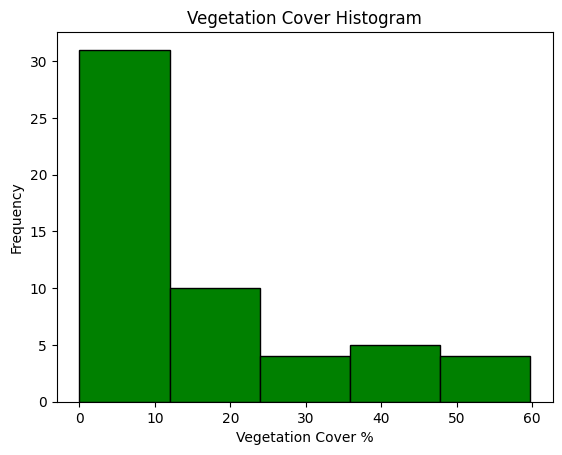

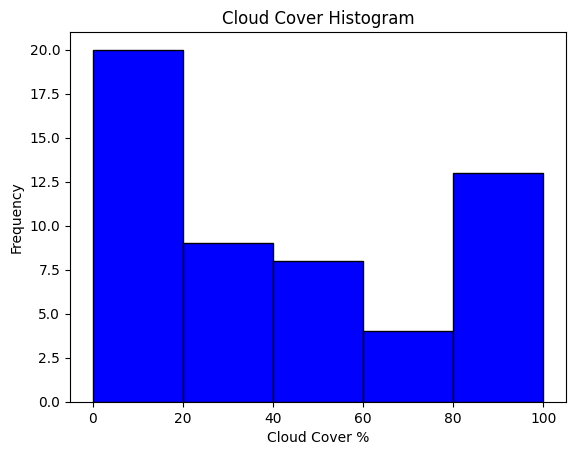

In [15]:
import matplotlib.pyplot as plt

# extract vegetation percentages

vegetation_cover = [
    scene.properties.get("s2:vegetation_percentage", 0)
    for scene in scenes
]

# cloud cover
cloud_cover = [
    scene.properties.get("eo:cloud_cover", 0)
    for scene in scenes
]

# plot veg histogram
plt.hist(vegetation_cover, bins=5, color='green', edgecolor='black')
plt.title("Vegetation Cover Histogram")
plt.xlabel("Vegetation Cover %")
plt.ylabel("Frequency")
plt.show()

# plot cloud histogram
plt.hist(cloud_cover, bins=5, color='blue', edgecolor='black')
plt.title("Cloud Cover Histogram")
plt.xlabel("Cloud Cover %")
plt.ylabel("Frequency")
plt.show()

In [13]:
print(scenes[0].properties)

{'created': '2024-09-27T12:11:54.305Z', 'platform': 'sentinel-2b', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 1.780791, 'proj:epsg': 32736, 'mgrs:utm_zone': 36, 'mgrs:latitude_band': 'M', 'mgrs:grid_square': 'WC', 'grid:code': 'MGRS-36MWC', 'view:sun_azimuth': 89.2602612853178, 'view:sun_elevation': 68.48338799094199, 's2:degraded_msi_data_percentage': 0.0164, 's2:nodata_pixel_percentage': 14.404249, 's2:saturated_defective_pixel_percentage': 0, 's2:cloud_shadow_percentage': 0.069376, 's2:vegetation_percentage': 2.257975, 's2:not_vegetated_percentage': 68.883479, 's2:water_percentage': 26.80541, 's2:unclassified_percentage': 0.180525, 's2:medium_proba_clouds_percentage': 0.061251, 's2:high_proba_clouds_percentage': 0.01297, 's2:thin_cirrus_percentage': 1.70657, 's2:snow_ice_percentage': 0, 's2:product_type': 'S2MSI2A', 's2:processing_baseline': '05.11', 's2:product_uri': 'S2B_MSIL2A_20240927T074609_N0511_R135_T36MWC_20240927T101219.SAFE', 's2:generation_ti

In [17]:
filtered_scenes = [
    scene.id
    for scene in scenes
    if scene.properties.get("s2:water_percentage", 0) > 25
    and scene.properties.get("eo:cloud_cover", 100) < 5
]

print("Filtered Scene IDs:", filtered_scenes)
print(len(filtered_scenes))

Filtered Scene IDs: ['S2B_36MWC_20240927_0_L2A', 'S2B_36MWC_20240907_0_L2A', 'S2B_36MWC_20240828_0_L2A', 'S2B_36MWC_20240818_0_L2A', 'S2A_36MWC_20240813_0_L2A', 'S2B_36MWC_20240808_0_L2A', 'S2A_36MWC_20240714_0_L2A', 'S2A_36MWC_20240624_0_L2A', 'S2B_36MWC_20240619_0_L2A', 'S2B_36MWC_20240430_0_L2A', 'S2B_36MWC_20240311_0_L2A']
11


In [24]:
import pkg_resources

for package in ["requests", "pystac-client", "matplotlib", "jupyterlab", "shapely"]:
    version = pkg_resources.get_distribution(package).version
    print(f"{package}: {version}")

requests: 2.32.3
pystac-client: 0.8.5
matplotlib: 3.9.4
jupyterlab: 4.3.4
shapely: 2.0.6
